## Extracting and Reading the Data

This data has been extracted from the Google Play API which stores information about songs in a Python dictionary format for each song. This dictionary data is stored in a list and then saved as a binary file `data_list`. 

First we import the pickle library to read the data from `data_list`.

In [1]:
# import data
import pickle
data = pickle.load(open('data_list','rb'))

Now, we store the data in the dictionaries as individual lists. The following lists which are created are the types of data available about each song. We append 0 or NIL if the data is not present and an error is raised.

In [2]:
creationTimestamp = []
albumArtist = []
year = []
genre = []
playCount = []
title = []

for each_song in data:
    creationTimestamp.append(each_song['creationTimestamp'])
    albumArtist.append(each_song['albumArtist'])
    try:
        year.append(each_song['year'])
    except:
        year.append(0)
    try:
        genre.append(each_song['genre'])
    except:
        genre.append("NIL")
    try:
        title.append(each_song['title'])
    except:
        title.append("NIL")
    try:
        playCount.append(each_song['playCount'])
    except:
        playCount.append(0)

Now, we zip the title and playCount together so that they are "tupled" together and then it is stored as a dictionary. Then we sort this dictionary in descending order of the playCount. We use operator.itemgetter(1) as the key, i.e. the playCount

In [3]:
import operator
count_song = dict(zip(title,playCount))
count_song_sorted = sorted(count_song.items(),key = operator.itemgetter(1),reverse=True)

The top song names are then separated from the playcount in two different lists.

In [4]:
top_songs = [x[0] for x in count_song_sorted ]
count_top_songs = [x[1] for x in count_song_sorted]

Now, we import plotly which is a python library for making data visualizations and bring interactive plotly graphs to the offline environment. Using `graph_objs` we can have various types of graph objects. Setting `init_notebook_mode(connected=True)` plots the graph inside a Jupyter Notebook environment.

In [5]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
init_notebook_mode(connected=True)

In [7]:
iplot([go.Scatter(x=top_songs[:10], y=count_top_songs[:10])])

Let us try to print the information we have about each song.

In [8]:
keys = data[0].keys()

In [9]:
keys

dict_keys(['kind', 'id', 'clientId', 'creationTimestamp', 'lastModifiedTimestamp', 'recentTimestamp', 'deleted', 'title', 'artist', 'composer', 'album', 'albumArtist', 'year', 'trackNumber', 'genre', 'durationMillis', 'albumArtRef', 'artistArtRef', 'playCount', 'discNumber', 'estimatedSize', 'trackType', 'storeId', 'albumId', 'artistId', 'nid', 'explicitType'])

The data that we have about the first song in the file can also be extracted as follows.

In [10]:
data[0]

{'album': 'Best Of Arijit Singh',
 'albumArtRef': [{'aspectRatio': '1',
   'autogen': False,
   'kind': 'sj#imageRef',
   'url': 'http://lh3.googleusercontent.com/f5F2l-jGjPpKJEm9ezLNjS_YujPUmmXjEdm5oZ3FZhCzPDXAc8xiiKcDGKE9jQZcZW-pwP-Ly-M'}],
 'albumArtist': 'Arijit Singh',
 'albumId': 'Byxh44kqeqpqbkpvhpcb2mk4zwq',
 'artist': 'Arijit Singh',
 'artistArtRef': [{'aspectRatio': '2',
   'autogen': False,
   'kind': 'sj#imageRef',
   'url': 'http://lh3.googleusercontent.com/WOUEVHdt9MDz0OF_lvQTsDzOC-JsqJYznYsfcUkzXN3dqEqoWhmJTraW_4end4JH025L9WeLl4U'}],
 'artistId': ['Aup5wtp2mlyvetsde3l2tdsny5m',
  'Av366nf2kehcxktrcn3qifkfuym',
  'Amboi4wb6r4ahezu6jletgkkv3e'],
 'clientId': 'f7355e89-ac32-463d-94a7-0bfa4e7aca20',
 'composer': '',
 'creationTimestamp': '1491623824763690',
 'deleted': False,
 'discNumber': 1,
 'durationMillis': '329000',
 'estimatedSize': '13197088',
 'explicitType': '2',
 'genre': 'Hindi',
 'id': 'b441b6b9-986b-33a1-b1a2-2387c29b10e7',
 'kind': 'sj#track',
 'lastModifiedTi

## A few other methods

Importing seaborn and matplotlib.pyplot, which are other libraries in python to plot data.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We are using pandas library to convert the data in a dataframe. This is easily done using just a single command.

In [12]:
df = pd.DataFrame(data)

Let us see a sample of the information we have in the DataFrame object.

In [13]:
df.sample()

,album,albumArtRef,albumArtist,albumId,artist,artistArtRef,artistId,clientId,composer,creationTimestamp,...,nid,playCount,primaryVideo,rating,recentTimestamp,storeId,title,trackNumber,trackType,year
182,Chak De India,"[{'kind': 'sj#imageRef', 'url': 'http://lh3.go...",Salim - Sulaiman,Bgmqm665zy7loeyayu3vln6ymcm,"Sukhvinder Singh,Salim Merchant & Marianne D'Cruz",NaN,[Ad2t7sxcel5regr4hiri4kllhpu],45d56f8b-d605-4f29-8117-14dbc01cb3ec,,1494345693649527,...,T7d6qc7lpet76lrw5pdyqxqnlym,14.0,NaN,NaN,1494345693647000,T7d6qc7lpet76lrw5pdyqxqnlym,Chak De India,1,8,2007.0


We drop the columns that we don't require which are passed as a list in the df.drop() function in pandas.

In [14]:
df = df.drop(["albumArtRef", "artistArtRef", "albumId", "artistId", "clientId", "nid", "storeId"], axis=1)

As we can see, the columns which were passed have been dropped.

In [15]:
df.sample()

,album,albumArtist,artist,composer,creationTimestamp,deleted,discNumber,durationMillis,estimatedSize,explicitType,...,lastModifiedTimestamp,lastRatingChangeTimestamp,playCount,primaryVideo,rating,recentTimestamp,title,trackNumber,trackType,year
254,Death Of A Bachelor,Panic! At The Disco,Panic! At The Disco,,1508161698795876,False,1,158000,6348827,2,...,1528361108184461,NaN,30.0,NaN,NaN,1508400261400000,Emperor's New Clothes,4,8,2016.0


Let us see the first 5 rows of out DataFrame.

In [16]:
df.head()

,album,albumArtist,artist,composer,creationTimestamp,deleted,discNumber,durationMillis,estimatedSize,explicitType,...,lastModifiedTimestamp,lastRatingChangeTimestamp,playCount,primaryVideo,rating,recentTimestamp,title,trackNumber,trackType,year
0,Best Of Arijit Singh,Arijit Singh,Arijit Singh,,1491623824763690,False,1,329000,13197088,2,...,1500897890816586,NaN,8.0,NaN,NaN,1491623824761000,"Phir Mohabbat (From ""Murder 2"")",5,8,2016.0
1,21,Adele,Adele,,1491709830971456,False,1,223000,8931820,2,...,1502949714329987,NaN,10.0,NaN,NaN,1491709830969000,Rumour Has It,2,8,2011.0
2,Hybrid Theory (U.S. Version),Linkin Park,Linkin Park,,1491479207001616,False,1,216000,8679999,2,...,1503150304920429,NaN,11.0,"{'kind': 'sj#video', 'id': 'eVTXPUF4Oz4', 'thu...",NaN,1491479206999000,In The End,8,8,2000.0
3,Imagine,John Lennon,John Lennon,John Lennon,1491710130396608,False,1,197000,7915245,2,...,1503227531068060,NaN,7.0,NaN,NaN,1491710130393000,Gimme Some Truth (2010 - Remaster),6,8,1971.0
4,Imagine,John Lennon,John Lennon,John Lennon,1491710130396608,False,1,339000,13570233,2,...,1503422245641827,NaN,6.0,NaN,NaN,1491710130394000,How Do You Sleep? (2010 - Remaster),8,8,1971.0


The following command describes information about the data including count, maximum, minimum, standard deviation and quartiles.

In [17]:
df.describe()

,discNumber,playCount,trackNumber,year
count,736.000000,732.000000,736.000000,735.000000
mean,1.013587,24.524590,5.010870,2008.209524
std,0.115847,15.408197,4.822272,11.308875
min,1.000000,1.000000,1.000000,1902.000000
25%,1.000000,13.000000,1.000000,2006.000000
50%,1.000000,21.000000,3.000000,2012.000000
75%,1.000000,32.000000,7.000000,2015.000000
max,2.000000,92.000000,49.000000,2018.000000


This command will print the type of data which is held in each of the columns.

In [18]:
df.dtypes

album                         object
albumArtist                   object
artist                        object
composer                      object
creationTimestamp             object
deleted                         bool
discNumber                     int64
durationMillis                object
estimatedSize                 object
explicitType                  object
genre                         object
id                            object
kind                          object
lastModifiedTimestamp         object
lastRatingChangeTimestamp     object
playCount                    float64
primaryVideo                  object
rating                        object
recentTimestamp               object
title                         object
trackNumber                    int64
trackType                     object
year                         float64
dtype: object

We want to be able to compare size and duration of various songs. It will be easier to do so if we convert the object type data to numeric type data.

In [19]:
df["durationMillis"] = pd.to_numeric(df["durationMillis"])
df["estimatedSize"] = pd.to_numeric(df["estimatedSize"])

Now we count the number of nulls we have in each column.

In [20]:
df.isnull().sum()

album                          0
albumArtist                    0
artist                         0
composer                       0
creationTimestamp              0
deleted                        0
discNumber                     0
durationMillis                 0
estimatedSize                  0
explicitType                   0
genre                        497
id                             0
kind                           0
lastModifiedTimestamp          0
lastRatingChangeTimestamp    699
playCount                      4
primaryVideo                 524
rating                       699
recentTimestamp                0
title                          0
trackNumber                    0
trackType                      0
year                           1
dtype: int64

In [21]:
# df = df.dropna()

In [22]:
num_columns = ["discNumber", "playCount", "trackNumber", "year"]

## Obvious correlation as a sanity  check

Now we use seaborn joint plots to check the obvious correlations between various fields that we have in our DataFrame object.

### Duration vs Estimated Size

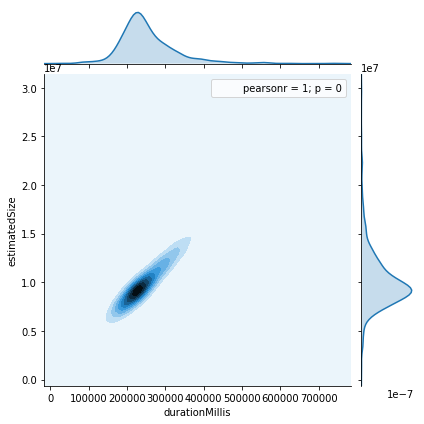

In [23]:
sns.jointplot(data = df, x = "durationMillis", y = "estimatedSize", kind='kde') 

### Duration vs Number of Plays

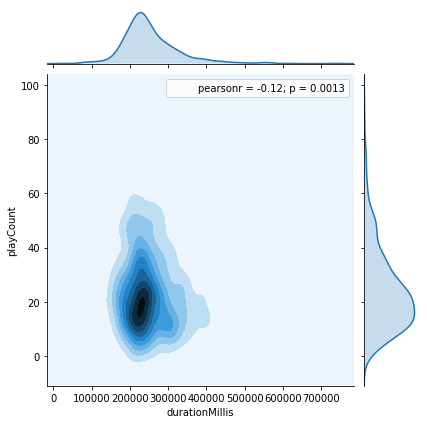

In [24]:
sns.jointplot(data = df, x = "durationMillis", y = "playCount", kind='kde')

### Number of Plays vs the Year

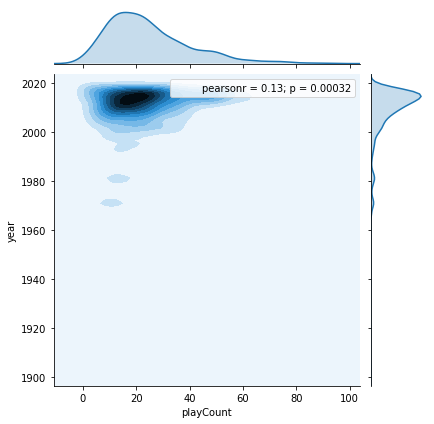

In [25]:
sns.jointplot(data = df, x = "playCount", y = "year", kind='kde')

Now we take the genre and playCount and drop the null items in them.

In [26]:
genre_playcount = df[["genre","playCount"]].dropna()

And we group the data by genre doing a sum of the playCount in each genre and sort in descending order of playCount.

In [27]:
genre_group = genre_playcount.groupby('genre')['playCount'].sum().reset_index().sort_values("playCount", ascending=False)
genre_group

,genre,playCount
2,Hindi,2603.0
7,World,970.0
6,Western,818.0
3,Pop,757.0
1,English,72.0
4,South America,34.0
5,South Asia,23.0
8,World Pop,15.0
0,Asia,10.0


## Top genres

Let's try plotting the data using pandas (which in turn uses matplotlib as base). First we plot a bar chart of the playCount by each genre.

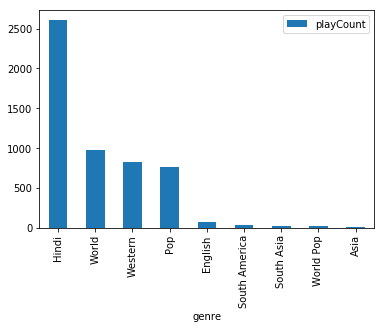

In [28]:
genre_group.plot(kind="bar", x=genre_group["genre"])

Now we move to playCount vs artist, similary as we did for playCount vs genre.

In [29]:
artist_playcount = df[["artist","playCount"]].dropna()

In [30]:
artist_group = artist_playcount.groupby('artist')['playCount'].sum().reset_index().sort_values("playCount", ascending=False)
artist_group.head()

,artist,playCount
21,Arctic Monkeys,596.0
80,Ed Sheeran,570.0
63,Coldplay,558.0
17,Amit Trivedi,367.0
120,Imagine Dragons,327.0


## Top 10 artists

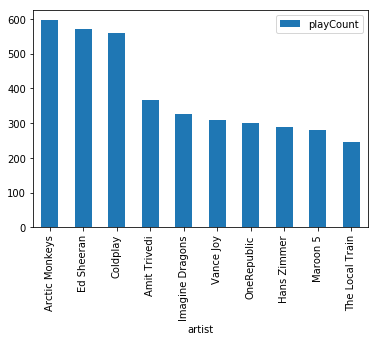

In [31]:
artist_group[:10].plot(kind="bar", x=artist_group[:10]["artist"])